In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Prepare the dataset for analysis
# Read in csv file
file_path = "Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv"
inital_df = pd.read_csv(file_path)

# Drop the unwanted columns.
inital_df = inital_df.drop(columns=['Data As Of', 'Start Date', 'End Date', 'ICD10_codes', 'Number of Mentions', 'Flag'])

# Only keep the rows where the Group is "By Month", and delete the row where Age Group is "All Ages"
inital_df = inital_df.loc[inital_df['Group'] == 'By Month']
clean_df = inital_df.loc[inital_df['Age Group'] != 'All Ages']

# Drop the NaN values
clean_df = clean_df.dropna()

# Convert Year and Month columns to integers
clean_df.loc[:, 'Year'] = clean_df['Year'].astype(int)
clean_df.loc[:, 'Month'] = clean_df['Month'].astype(int)
clean_df.loc[:, 'COVID-19 Deaths'] = clean_df['COVID-19 Deaths'].astype(int)

clean_df

,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
62100,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62101,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62102,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,0-24,9
62103,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,0-24,27
62104,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,0-24,19
...,...,...,...,...,...,...,...,...
546436,By Month,2022,11,Puerto Rico,COVID-19,COVID-19,Not stated,0
546437,By Month,2022,12,Puerto Rico,COVID-19,COVID-19,Not stated,0
546438,By Month,2023,1,Puerto Rico,COVID-19,COVID-19,Not stated,0
546439,By Month,2023,2,Puerto Rico,COVID-19,COVID-19,Not stated,0


In [3]:
respiratory_df = clean_df.loc[(clean_df['Condition Group'] == 'Respiratory diseases') & (clean_df['Age Group'] != 'Not stated') & (clean_df['State'] == 'United States')]
respiratory_df


,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
62100,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62101,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62102,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,0-24,9
62103,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,0-24,27
62104,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,0-24,19
...,...,...,...,...,...,...,...,...
64357,By Month,2022,11,United States,Respiratory diseases,Other diseases of the respiratory system,85+,257
64358,By Month,2022,12,United States,Respiratory diseases,Other diseases of the respiratory system,85+,375
64359,By Month,2023,1,United States,Respiratory diseases,Other diseases of the respiratory system,85+,433
64360,By Month,2023,2,United States,Respiratory diseases,Other diseases of the respiratory system,85+,250


In [4]:
total_respiratory_deaths_by_age_group = respiratory_df.groupby('Age Group').agg({'COVID-19 Deaths': 'sum'})

print(total_respiratory_deaths_by_age_group)

total_res_deaths = total_respiratory_deaths_by_age_group['COVID-19 Deaths'].sum()

print("Total number of COVID-19 deaths:", total_res_deaths)


           COVID-19 Deaths
Age Group                 
0-24                  3662
25-34                13002
35-44                33930
45-54                85393
55-64               194831
65-74               309979
75-84               330791
85+                 273031
Total number of COVID-19 deaths: 1244619


In [5]:
# Group the COVID-19 deaths by age group
total_respiratory_deaths_by_age_group = respiratory_df.groupby('Age Group').agg({'COVID-19 Deaths': 'sum'})

# Combine age groups into one group
total_respiratory_deaths_by_age_group.loc['0-44'] = total_respiratory_deaths_by_age_group.loc[['0-24', '25-34', '35-44']].sum()

# Remove the original age group rows
total_respiratory_deaths_by_age_group.drop(['0-24', '25-34', '35-44'], inplace=True)

# Print updated dataframe 
print(total_respiratory_deaths_by_age_group)
total_res_deaths = total_respiratory_deaths_by_age_group['COVID-19 Deaths'].sum()
print("Total number of COVID-19 deaths:", total_res_deaths)


           COVID-19 Deaths
Age Group                 
45-54                85393
55-64               194831
65-74               309979
75-84               330791
85+                 273031
0-44                 50594
Total number of COVID-19 deaths: 1244619


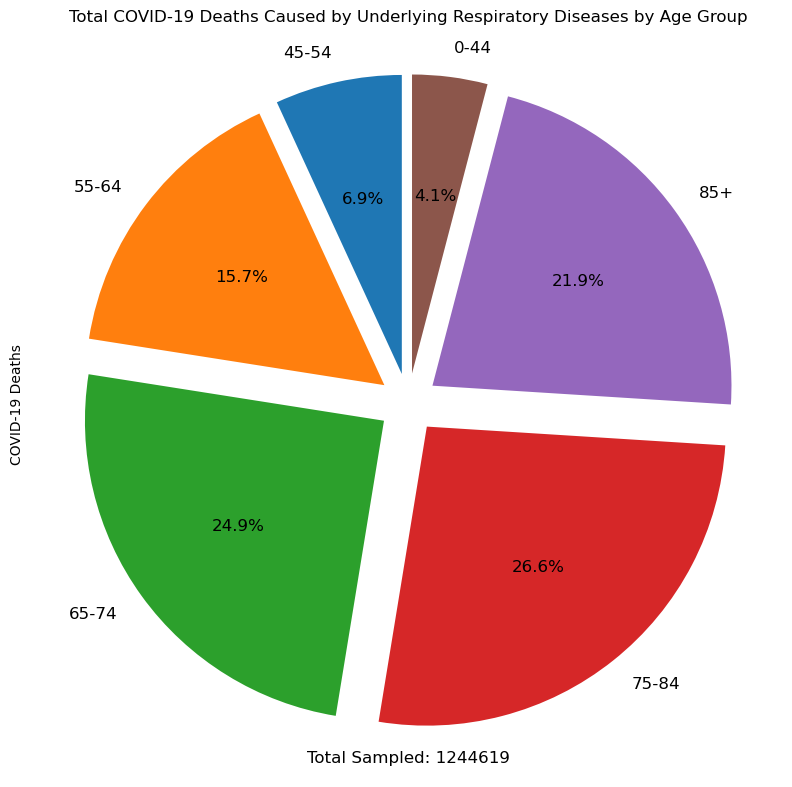

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

# Define labels and explode the slices
labels = total_respiratory_deaths_by_age_group.index
explode = [0.1] * len(labels)

# Create the pie chart
total_respiratory_deaths_by_age_group.plot(kind='pie', y='COVID-19 Deaths', ax=ax, autopct='%1.1f%%', startangle=90,
                                           explode=explode, textprops={'fontsize': 12})

# Set the title
ax.set_title('Total COVID-19 Deaths Caused by Underlying Respiratory Diseases by Age Group')
ax.legend().remove()

# Calculate the total number of people sampled
total_res_deaths = total_respiratory_deaths_by_age_group['COVID-19 Deaths'].sum()

# Add the total number of people sampled to the chart
ax.text(0, -1.2, f'Total Sampled: {total_res_deaths}', fontsize=12, ha='center')

plt.tight_layout()

plt.savefig('total_respiratory_deaths_by_age_group.png')


plt.show()


In [7]:
unique_res_conditions = respiratory_df['Condition'].nunique()
conditions_res = respiratory_df['Condition'].unique()

print("Number of unique values of 'Condition':", unique_res_conditions)
print("Unique conditions:", conditions_res)

Number of unique values of 'Condition': 6
Unique conditions: ['Influenza and pneumonia' 'Chronic lower respiratory diseases'
 'Adult respiratory distress syndrome' 'Respiratory failure'
 'Respiratory arrest' 'Other diseases of the respiratory system']


In [ ]:
circ_df = clean_df.loc[(clean_df['Condition Group'] == 'Circulatory diseases') & (clean_df['Age Group'] != 'Not stated') & (clean_df['State'] == 'United States')]
circ_df

,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
64440,By Month,2020,1,United States,Circulatory diseases,Hypertensive diseases,0-24,0
64441,By Month,2020,2,United States,Circulatory diseases,Hypertensive diseases,0-24,0
64442,By Month,2020,3,United States,Circulatory diseases,Hypertensive diseases,0-24,0
64443,By Month,2020,4,United States,Circulatory diseases,Hypertensive diseases,0-24,6
64444,By Month,2020,5,United States,Circulatory diseases,Hypertensive diseases,0-24,3
...,...,...,...,...,...,...,...,...
67087,By Month,2022,11,United States,Circulatory diseases,Other diseases of the circulatory system,85+,441
67088,By Month,2022,12,United States,Circulatory diseases,Other diseases of the circulatory system,85+,634
67089,By Month,2023,1,United States,Circulatory diseases,Other diseases of the circulatory system,85+,588
67090,By Month,2023,2,United States,Circulatory diseases,Other diseases of the circulatory system,85+,409


In [ ]:
total_circ_deaths_by_age_group = circ_df.groupby('Age Group').agg({'COVID-19 Deaths': 'sum'})

print(total_circ_deaths_by_age_group)

total_circ_deaths = total_circ_deaths_by_age_group['COVID-19 Deaths'].sum()

print("Total number of COVID-19 deaths:", total_circ_deaths)

           COVID-19 Deaths
Age Group                 
0-24                  1332
25-34                 4785
35-44                13813
45-54                37805
55-64                96135
65-74               172078
75-84               221753
85+                 247182
Total number of COVID-19 deaths: 794883


In [ ]:
# Group the COVID-19 deaths by age group
total_circ_deaths_by_age_group = circ_df.groupby('Age Group').agg({'COVID-19 Deaths': 'sum'})

# Combine age groups 0-24, 25-34, and 35-44 into one group, 0-44
total_circ_deaths_by_age_group.loc['0-44'] = total_circ_deaths_by_age_group.loc[['0-24', '25-34', '35-44']].sum()

# Remove the original age group rows
total_circ_deaths_by_age_group.drop(['0-24', '25-34', '35-44'], inplace=True)

# Print the updated dataframe and total number of COVID-19 deaths
print(total_circ_deaths_by_age_group)
total_circ_deaths = total_circ_deaths_by_age_group['COVID-19 Deaths'].sum()
print("Total number of COVID-19 deaths:", total_circ_deaths)


           COVID-19 Deaths
Age Group                 
45-54                37805
55-64                96135
65-74               172078
75-84               221753
85+                 247182
0-44                 19930
Total number of COVID-19 deaths: 794883


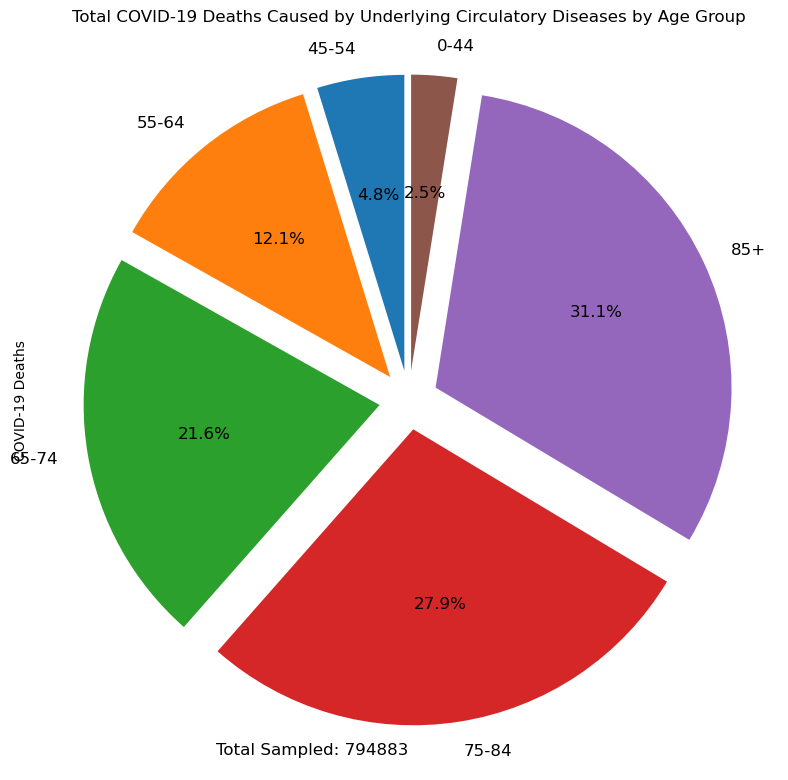

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Define labels and explode the slices
labels = total_circ_deaths_by_age_group.index
explode = [0.1] * len(labels)

# Create the pie chart
total_circ_deaths_by_age_group.plot(kind='pie', y='COVID-19 Deaths', ax=ax, autopct='%1.1f%%', startangle=90,
                                           explode=explode, textprops={'fontsize': 12})

# Set the title
ax.set_title('Total COVID-19 Deaths Caused by Underlying Circulatory Diseases by Age Group')
ax.legend().remove()

# Calculate the total number of people sampled
total_circ_deaths = total_circ_deaths_by_age_group['COVID-19 Deaths'].sum()

# Add the total number of people sampled to the chart
ax.text(0, -1.2, f'Total Sampled: {total_circ_deaths}', fontsize=12, ha='right')

plt.tight_layout()

plt.savefig('total_respiratory_deaths_by_age_group.png')


plt.show()


In [ ]:
unique_circ_conditions = circ_df['Condition'].nunique()
conditions_circ = circ_df['Condition'].unique()

print("Number of unique values of 'Condition':", unique_circ_conditions)
print("Unique conditions:", conditions_circ)

Number of unique values of 'Condition': 7
Unique conditions: ['Hypertensive diseases' 'Ischemic heart disease' 'Cardiac arrest'
 'Cardiac arrhythmia' 'Heart failure' 'Cerebrovascular diseases'
 'Other diseases of the circulatory system']


In [ ]:
# Group the data by condition and get the sum of deaths
total_deaths_by_condition = circ_df.groupby('Condition')['COVID-19 Deaths'].sum()

# Print the DataFrame
print(total_deaths_by_condition)


Condition
Cardiac arrest                              132436
Cardiac arrhythmia                           90160
Cerebrovascular diseases                     59124
Heart failure                                93607
Hypertensive diseases                       207703
Ischemic heart disease                      124040
Other diseases of the circulatory system     87813
Name: COVID-19 Deaths, dtype: int64


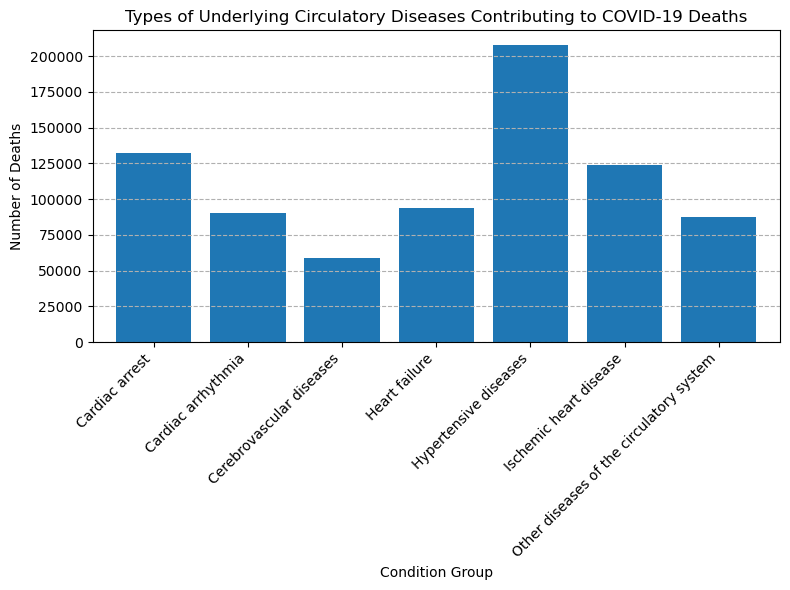

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
total_deaths_by_condition.plot(kind='bar', ax=ax, width=0.8)

# Set the title and axis labels
ax.set_title('Types of Underlying Circulatory Diseases Contributing to COVID-19 Deaths')
ax.set_xlabel('Condition Group')
ax.set_ylabel('Number of Deaths')

# Rotate the x-axis tick labels
ax.tick_params(axis='x', labelrotation=45)

# Add gridlines
ax.grid(True, axis='y', linestyle='--')

ax.set_xticklabels(total_deaths_by_condition.index, rotation=45, ha='right')

plt.tight_layout()

#Save fig
plt.savefig('total_covid19_deaths_by_condition_group.png', dpi=300)

# Display the chart
plt.show()
